<a href="https://colab.research.google.com/github/luciavazcor/Activos-ETL/blob/main/ETL_TFG_Luci%CC%81a_Va%CC%81zquez_Corbella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

In [53]:
 # Cargar datos
bitcoin_df = pd.read_excel('/content/Bitcoin.xlsx')
oro_df = pd.read_excel('/content/Oro.xlsx')
dolar_df = pd.read_excel('/content/Dolar.xlsx')

In [54]:
#Previsualizamos los datos
bitcoin_df.head()

,Exchange Date,Bid,Ask,High,Low,Open,Refresh Rate,BidNet,Volatilidad,Liquidez,Rendimiento
0,2024-12-31,93686.62,93735.73,96196.45,91794.00,91923.0,346837.0,1763.62,0.047893,49.11,-0.019927
1,2024-12-30,91923.00,91924.00,95007.72,91262.02,93792.0,337885.0,-1263.00,0.039936,1.00,-0.012685
2,2024-12-29,93186.00,93187.00,95582.49,93007.99,94997.0,321940.0,-1811.00,0.027101,1.00,0.006313
3,2024-12-28,94997.00,94998.00,95190.14,93404.51,94401.0,321940.0,612.55,0.018915,1.00,-0.013491
4,2024-12-27,94384.45,94400.61,97336.00,93136.41,95692.0,321940.0,-1308.55,0.043887,16.16,-0.027807


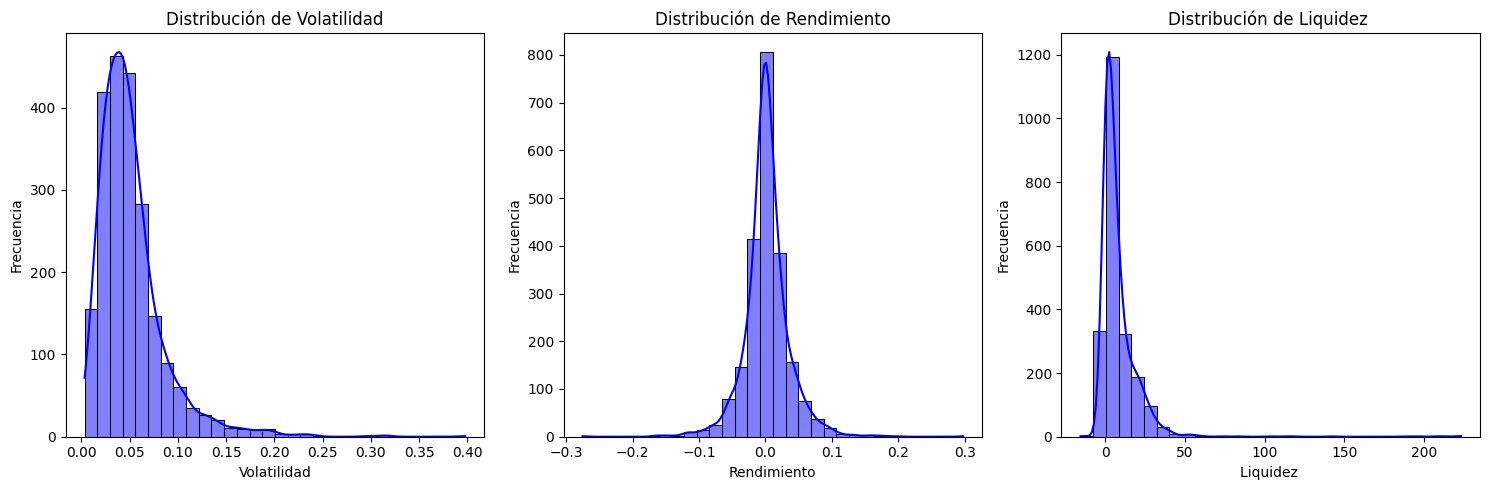

In [59]:
# Histograma Bitcoin: Volatilidad, Rendimiento, Liquidez
variables = ["Volatilidad", "Rendimiento", "Liquidez "]

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(bitcoin_df[var], bins=30, kde=True, color='blue')
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Matriz de Correlación - Bitcoin:
               Exchange Date       Bid       Ask      High       Low  \
Exchange Date       1.000000  0.730223  0.730145  0.725856  0.736188   
Bid                 0.730223  1.000000  1.000000  0.999336  0.999177   
Ask                 0.730145  1.000000  1.000000  0.999340  0.999174   
High                0.725856  0.999336  0.999340  1.000000  0.998605   
Low                 0.736188  0.999177  0.999174  0.998605  1.000000   
Open                0.730043  0.998528  0.998530  0.999276  0.998875   
Refresh Rate       -0.094829  0.169119  0.169219  0.177724  0.159009   
BidNet              0.022724  0.053881  0.053838  0.028130  0.032185   
Volatilidad        -0.293372 -0.089330 -0.089215 -0.070743 -0.113138   
Liquidez           -0.014712  0.137814  0.138470  0.143820  0.133466   
Rendimiento        -0.016041  0.010085  0.010067  0.010226  0.013668   

                   Open  Refresh Rate    BidNet  Volatilidad  Liquidez   \
Exchange Date  0.730043    

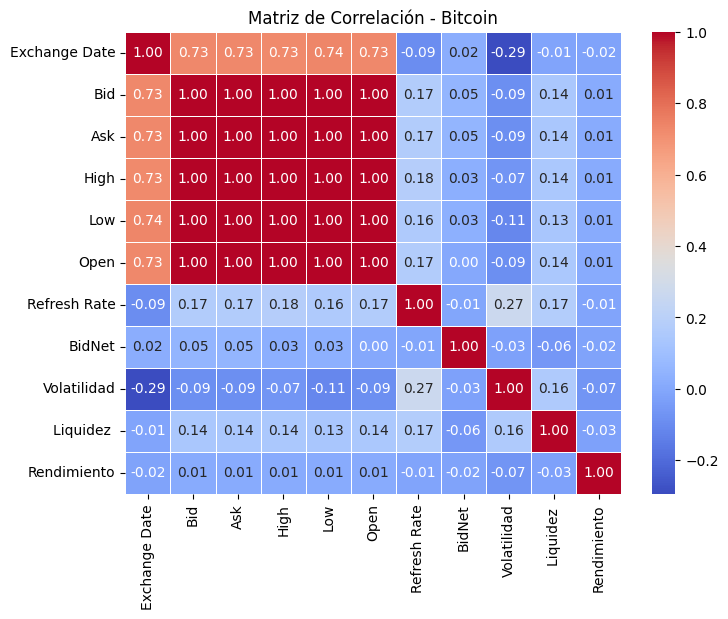

In [4]:
# Calculamos la matriz de correlación
correlation_matrix = bitcoin_df.corr()

# Mostramos la matriz de correlación en consola
print("Matriz de Correlación - Bitcoin:")
print(correlation_matrix)

# Visualización con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Bitcoin")
plt.show()

Matriz de Correlación - Oro:
                    Exchange Date       Bid       Ask      High       Low  \
Exchange Date            1.000000 -0.867171 -0.867324 -0.869422 -0.864808   
Bid                     -0.867171  1.000000  0.999995  0.999353  0.999296   
Ask                     -0.867324  0.999995  1.000000  0.999373  0.999284   
High                    -0.869422  0.999353  0.999373  1.000000  0.998976   
Low                     -0.864808  0.999296  0.999284  0.998976  1.000000   
Open                    -0.866517  0.998528  0.998540  0.999171  0.999386   
Refresh Rate             0.593454 -0.594065 -0.594178 -0.593200 -0.593461   
BidNet                   0.010402  0.014211  0.013884 -0.009717 -0.014145   
Volatilidad             -0.017059 -0.095710 -0.095095 -0.075571 -0.120067   
Liquidez                -0.223629  0.202081  0.205204  0.207795  0.198307   
Rendimiento diario      -0.022926  0.014068  0.014030  0.025433  0.023073   

                        Open  Refresh Rate    

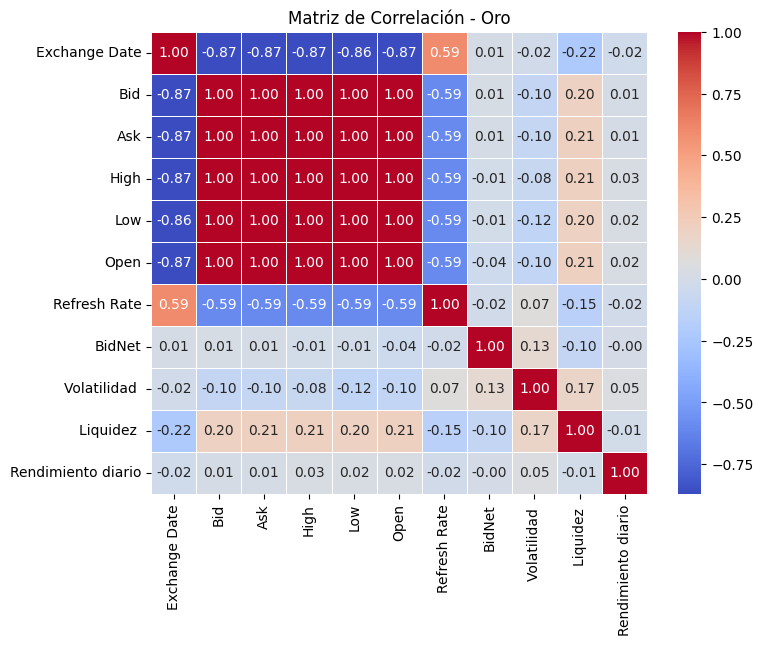

In [5]:
# Calculamos la matriz de correlación
correlation_matrix = oro_df.corr()

print("Matriz de Correlación - Oro:")
print(correlation_matrix)

# Visualización con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Oro")
plt.show()

Matriz de Correlación - Dólar:
                    Exchange Date  Trade Price  Rendimiento diario
Exchange Date            1.000000     0.637839            0.014963
Trade Price              0.637839     1.000000            0.049246
Rendimiento diario       0.014963     0.049246            1.000000


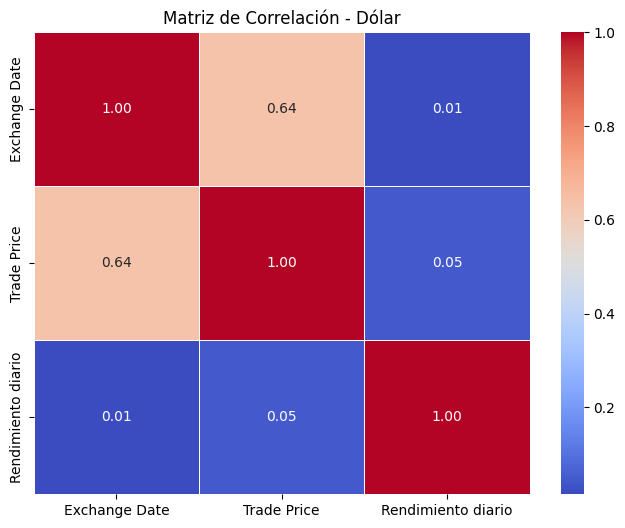

In [6]:
# Calculamos la matriz de correlación
print("Matriz de Correlación - Dólar:")
print(correlation_matrix)

# Visualización con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Dólar")
plt.show()

In [7]:
bitcoin_df['Exchange Date'] = pd.to_datetime(bitcoin_df['Exchange Date'])
bitcoin_df['Año'] = bitcoin_df['Exchange Date'].dt.year
bitcoin_df['Mes'] = bitcoin_df['Exchange Date'].dt.month
bitcoin_df['Día'] = bitcoin_df['Exchange Date'].dt.day

In [8]:
# Número de variables (columnas)
numero_variables = bitcoin_df.shape[1]

# Número de observaciones (filas)
numero_observaciones = bitcoin_df.shape[0]

# Tipos de datos
tipos_datos = bitcoin_df.dtypes

formato = bitcoin_df.info()

# Imprime los resultados
print(f"Número de variables (columnas): {numero_variables}")
print(f"Número de observaciones (filas): {numero_observaciones}")
print("\nTipos de datos por columna:")
print(tipos_datos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Exchange Date  2192 non-null   datetime64[ns]
 1   Bid            2192 non-null   float64       
 2   Ask            2192 non-null   float64       
 3   High           2192 non-null   float64       
 4   Low            2192 non-null   float64       
 5   Open           2192 non-null   float64       
 6   Refresh Rate   2188 non-null   float64       
 7   BidNet         2191 non-null   float64       
 8   Volatilidad    2192 non-null   float64       
 9   Liquidez       2192 non-null   float64       
 10  Rendimiento    2191 non-null   float64       
 11  Año            2192 non-null   int32         
 12  Mes            2192 non-null   int32         
 13  Día            2192 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(3)
memory usage: 214.2 KB
Númer

In [9]:
# Convierte la columna 'Exchange Date' a objetos datetime para mejorar análisis
oro_df['Exchange Date'] = pd.to_datetime(oro_df['Exchange Date'])
oro_df['Año'] = oro_df['Exchange Date'].dt.year
oro_df['Mes'] = oro_df['Exchange Date'].dt.month
oro_df['Día'] = oro_df['Exchange Date'].dt.day


In [10]:
# Número de variables (columnas)
numero_variables = oro_df.shape[1]

# Número de observaciones (filas)
numero_observaciones = oro_df.shape[0]

# Tipos de datos
tipos_datos = oro_df.dtypes

# Formato (estructura general del DataFrame)
formato = oro_df.info()

# Imprime los resultados
print(f"Número de variables (columnas): {numero_variables}")
print(f"Número de observaciones (filas): {numero_observaciones}")
print("\nTipos de datos por columna:")
print(tipos_datos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Exchange Date       1566 non-null   datetime64[ns]
 1   Bid                 1566 non-null   float64       
 2   Ask                 1566 non-null   float64       
 3   High                1557 non-null   float64       
 4   Low                 1557 non-null   float64       
 5   Open                1557 non-null   float64       
 6   Refresh Rate        1557 non-null   float64       
 7   BidNet              1565 non-null   float64       
 8   Volatilidad         1557 non-null   float64       
 9   Liquidez            1566 non-null   float64       
 10  Rendimiento diario  1556 non-null   float64       
 11  Año                 1566 non-null   int32         
 12  Mes                 1566 non-null   int32         
 13  Día                 1566 non-null   int32       

In [11]:
# Convierte la columna 'Exchange Date' a objetos datetime para mejorar análisis
dolar_df['Exchange Date'] = pd.to_datetime(dolar_df['Exchange Date'])
dolar_df['Año'] = dolar_df['Exchange Date'].dt.year
dolar_df['Mes'] = dolar_df['Exchange Date'].dt.month
dolar_df['Día'] = dolar_df['Exchange Date'].dt.day
dolar_df['Día de la Semana'] = dolar_df['Exchange Date'].dt.dayofweek

In [12]:
# Número de variables (columnas)
numero_variables = dolar_df.shape[1]

# Número de observaciones (filas)
numero_observaciones = dolar_df.shape[0]

# Tipos de datos
tipos_datos = dolar_df.dtypes

# Formato (estructura general del DataFrame)
formato = dolar_df.info()

# Imprime los resultados
print(f"Número de variables (columnas): {numero_variables}")
print(f"Número de observaciones (filas): {numero_observaciones}")
print("\nTipos de datos por columna:")
print(tipos_datos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Exchange Date       1560 non-null   datetime64[ns]
 1   Trade Price         1560 non-null   float64       
 2   Rendimiento diario  1559 non-null   float64       
 3   Año                 1560 non-null   int32         
 4   Mes                 1560 non-null   int32         
 5   Día                 1560 non-null   int32         
 6   Día de la Semana    1560 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 61.1 KB
Número de variables (columnas): 7
Número de observaciones (filas): 1560

Tipos de datos por columna:
Exchange Date         datetime64[ns]
Trade Price                  float64
Rendimiento diario           float64
Año                            int32
Mes                            int32
Día                            int

In [13]:
def analisis_medidas(dataframes):
    for nombre, df in dataframes.items():
        print(f"\n--- Análisis Estadístico {nombre} ---")
        numeric_cols = df.select_dtypes(include=[np.number]).columns

        for col in numeric_cols:
            print(f"\n{col}:")
            # Medidas de tendencia central
            print(f"Tendencia Central:")
            print(f"- Media: {df[col].mean():.4f}")
            print(f"- Mediana: {df[col].median():.4f}")
            print(f"- Moda: {df[col].mode()[0]:.4f}")

            # Medidas de dispersión
            print(f"\nDispersión:")
            print(f"- Varianza: {df[col].var():.4f}")
            print(f"- Desviación Estándar: {df[col].std():.4f}")
            print(f"- Rango: {df[col].max() - df[col].min():.4f}")
            print(f"- Coeficiente de Variación: {df[col].std() / df[col].mean() * 100:.2f}%")

            # Medidas de frecuencia
            print("\nFrecuencia:")
            frecuencia = df[col].value_counts(normalize=True)
            print("Top 5 valores más frecuentes:")
            print(frecuencia.head())

# Ejecutar análisis
dataframes = {
    'Bitcoin': bitcoin_df,
    'Oro': oro_df,
    'Dólar': dolar_df
}
analisis_medidas(dataframes)


--- Análisis Estadístico Bitcoin ---

Bid:
Tendencia Central:
- Media: 31462.5465
- Mediana: 27369.0250
- Moda: 46309.6800

Dispersión:
- Varianza: 488293310.4742
- Desviación Estándar: 22097.3598
- Rango: 103057.1600
- Coeficiente de Variación: 70.23%

Frecuencia:
Top 5 valores más frecuentes:
Bid
46309.68    0.001369
17008.42    0.000912
27994.00    0.000912
18109.46    0.000912
19383.00    0.000912
Name: proportion, dtype: float64

Ask:
Tendencia Central:
- Media: 31470.7299
- Mediana: 27370.3700
- Moda: 7474.5500

Dispersión:
- Varianza: 488383554.9771
- Desviación Estándar: 22099.4017
- Rango: 103057.1600
- Coeficiente de Variación: 70.22%

Frecuencia:
Top 5 valores más frecuentes:
Ask
26045.00    0.000912
11043.93    0.000912
9650.74     0.000912
11511.00    0.000912
36270.23    0.000912
Name: proportion, dtype: float64

High:
Tendencia Central:
- Media: 32187.3039
- Mediana: 27841.4450
- Moda: 48572.4300

Dispersión:
- Varianza: 509300231.3205
- Desviación Estándar: 22567.6811


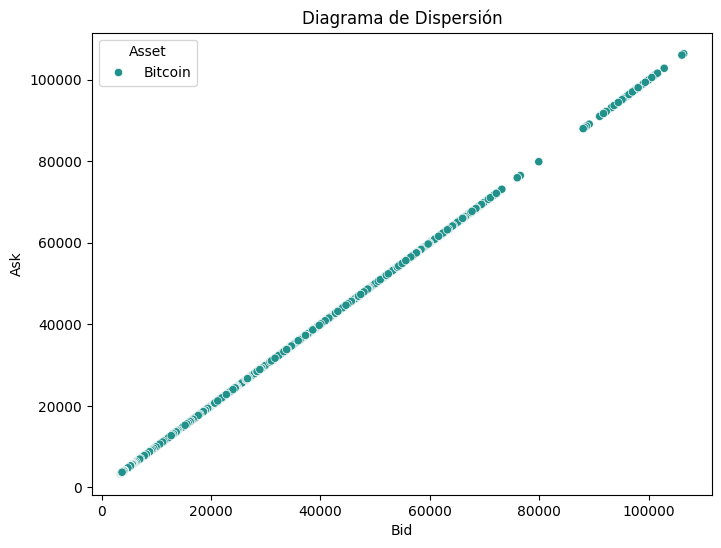

In [14]:
# Diagrama de dispersión
data = pd.DataFrame({
    'Asset': ['Bitcoin']*len(bitcoin_df),
    'Bid': bitcoin_df['Bid'],
    'Ask': bitcoin_df['Ask'],
    'High': bitcoin_df['High'],
    'Low': bitcoin_df['Low'],
    'Volatilidad': bitcoin_df['Volatilidad'],
    'Rendimiento': bitcoin_df['Rendimiento'],
    'Año': bitcoin_df['Año'],
    'Mes': bitcoin_df['Mes'],
    'Día': bitcoin_df['Día'],
    'Exchange Date': bitcoin_df['Exchange Date']
})
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre Bid(oferta) y Ask(demanda) con Bitcoin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Bid', y='Ask', hue='Asset', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Bid')
plt.ylabel('Ask')
plt.legend(title='Asset')
plt.show()

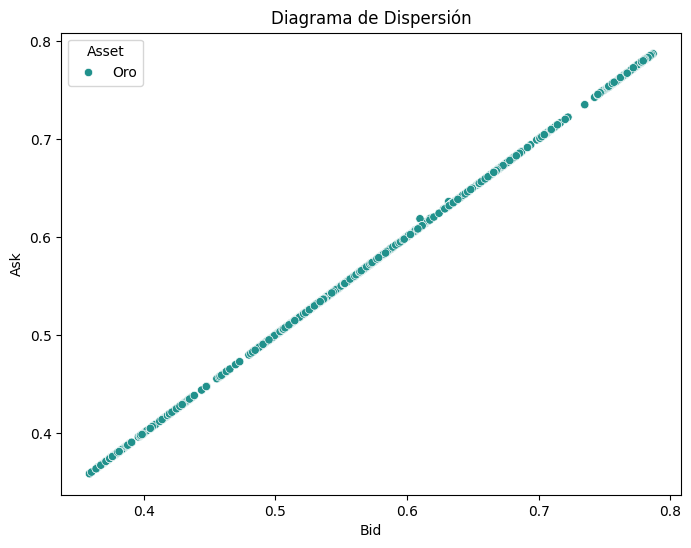

In [15]:
# Diagrama de dispersión
data2 = pd.DataFrame({
    'Asset': ['Oro']*len(oro_df),
    'Bid': oro_df['Bid'],
    'Ask': oro_df['Ask'],
    'High': oro_df['High'],
    'Low': oro_df['Low'],
    'Volatilidad': oro_df[oro_df.columns[5]],
    'Rendimiento': oro_df['Rendimiento diario'],
    'Año': oro_df['Año'],
    'Mes': oro_df['Mes'],
    'Día': oro_df['Día']
})
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre Bid(oferta) y Ask(demanda) con Oro
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x='Bid', y='Ask', hue='Asset', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Bid')
plt.ylabel('Ask')
plt.legend(title='Asset')
plt.show()

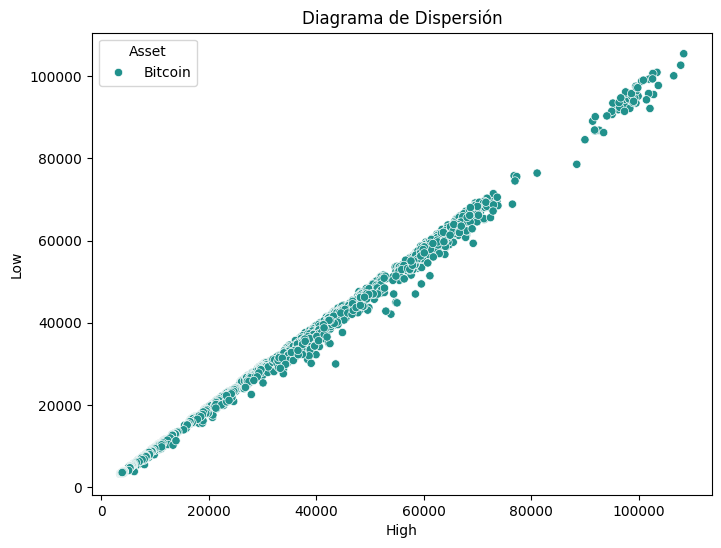

In [16]:
# Diagrama de dispersión
data = pd.DataFrame({
    'Asset': ['Bitcoin']*len(bitcoin_df),
    'Bid': bitcoin_df['Bid'],
    'Ask': bitcoin_df['Ask'],
    'High': bitcoin_df['High'],
    'Low': bitcoin_df['Low'],
    'Volatilidad': bitcoin_df['Volatilidad'],
    'Rendimiento': bitcoin_df['Rendimiento'],
    'Año': bitcoin_df['Año'],
    'Mes': bitcoin_df['Mes'],
    'Día': bitcoin_df['Día'],
    'Exchange Date': bitcoin_df['Exchange Date']

})
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre High y Low con Bitcoin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='High', y='Low', hue='Asset', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('High')
plt.ylabel('Low')
plt.legend(title='Asset')
plt.show()

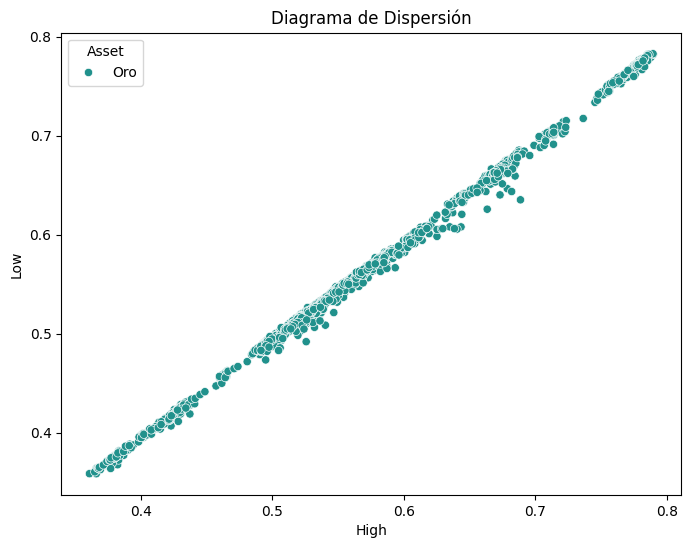

In [17]:
# Diagrama de dispersión
data2 = pd.DataFrame({
    'Asset': ['Oro']*len(oro_df),
    'Bid': oro_df['Bid'],
    'Ask': oro_df['Ask'],
    'High': oro_df['High'],
    'Low': oro_df['Low'],
    'Volatilidad': oro_df[oro_df.columns[5]],
    'Rendimiento': oro_df['Rendimiento diario']
})
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre High y Low con Oro
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x='High', y='Low', hue='Asset', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('High')
plt.ylabel('Low')
plt.legend(title='Asset')
plt.show()

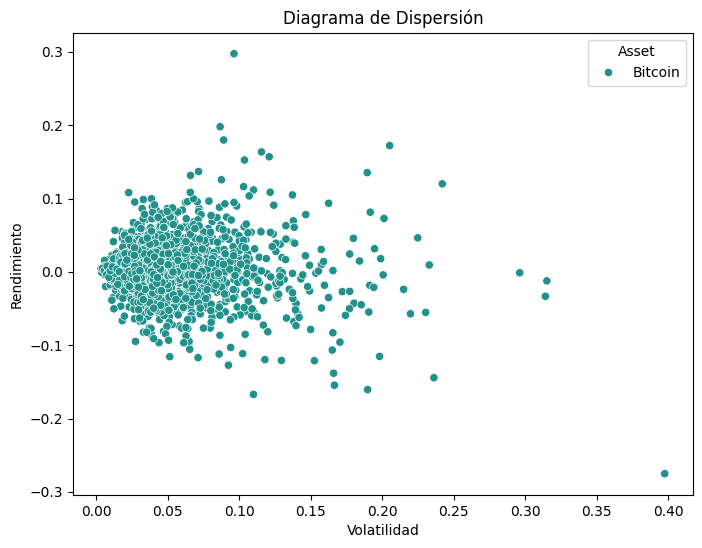

In [18]:
# Diagrama de dispersión
data = pd.DataFrame({
    'Asset': ['Bitcoin']*len(bitcoin_df),
    'Bid': bitcoin_df['Bid'],
    'Ask': bitcoin_df['Ask'],
    'High': bitcoin_df['High'],
    'Low': bitcoin_df['Low'],
    'Volatilidad': bitcoin_df['Volatilidad'],
    'Rendimiento': bitcoin_df['Rendimiento'],
    'Año': bitcoin_df['Año'],
    'Mes': bitcoin_df['Mes'],
    'Día': bitcoin_df['Día'],
    'Exchange Date': bitcoin_df['Exchange Date']
})
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre Volatilidad y Rendimiento con Bitcoin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Volatilidad', y='Rendimiento', hue='Asset', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.legend(title='Asset')
plt.show()

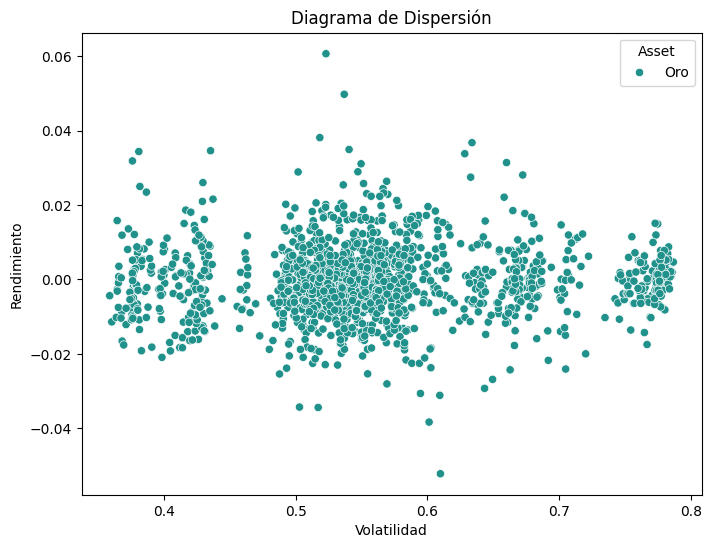

In [19]:
# Diagrama de dispersión
data2 = pd.DataFrame({
    'Asset': ['Oro']*len(oro_df),
    'Bid': oro_df['Bid'],
    'Ask': oro_df['Ask'],
    'High': oro_df['High'],
    'Low': oro_df['Low'],
    'Volatilidad': oro_df[oro_df.columns[5]],
    'Rendimiento': oro_df['Rendimiento diario'],
    'Año': oro_df['Año'],
    'Mes': oro_df['Mes'],
    'Día': oro_df['Día'],
    'Exchange Date': oro_df['Exchange Date']
})
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre Volatilidad y Rendimiento con Oro
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x='Volatilidad', y='Rendimiento', hue='Asset', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.legend(title='Asset')
plt.show()

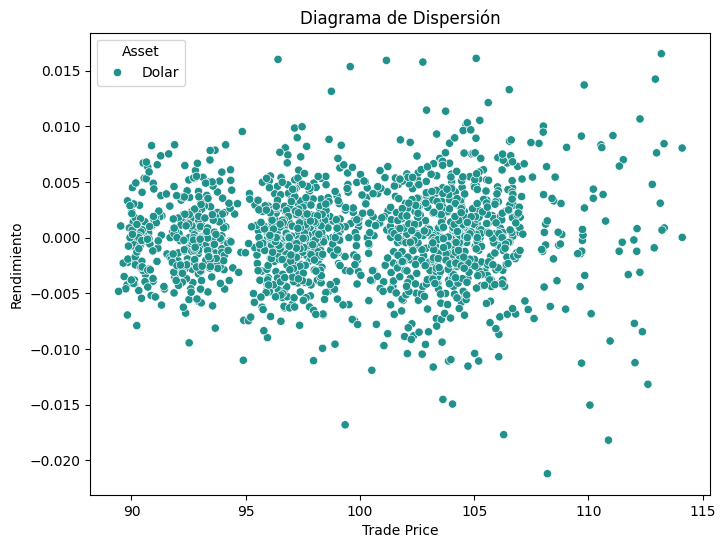

In [20]:
# Diagrama de dispersión
data3 = pd.DataFrame({
    'Asset': ['Dolar']*len(dolar_df),
    'Trade Price': dolar_df['Trade Price'],
    'Rendimiento': dolar_df['Rendimiento diario'],
    'Año': dolar_df['Año'],
    'Mes': dolar_df['Mes'],
    'Día': dolar_df['Día'],
    'Día de la Semana': dolar_df['Día de la Semana'],
    'Exchange Date': dolar_df['Exchange Date']
})
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre Trade price y Rendimiento con Dólar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data3, x='Trade Price', y='Rendimiento', hue='Asset', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Trade Price')
plt.ylabel('Rendimiento')
plt.legend(title='Asset')
plt.show()

<ipython-input-21-609a1be733b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Mes', y='Volatilidad', palette='pastel')


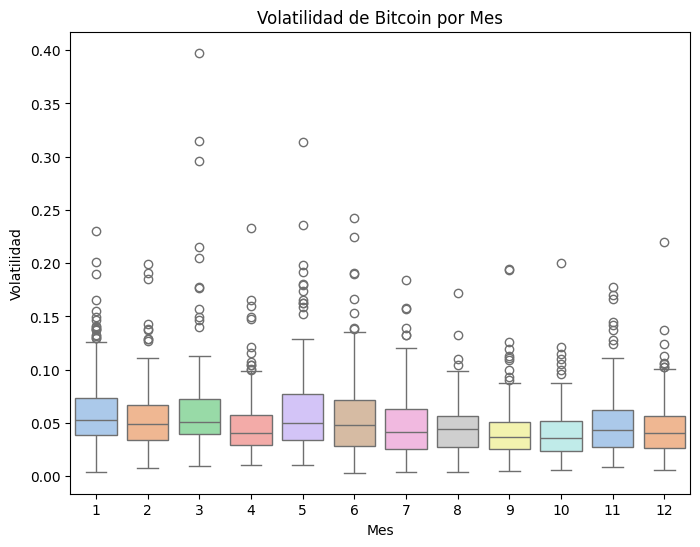

In [21]:
# Gráfico de cajas - Bitcoin
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Mes', y='Volatilidad', palette='pastel')
plt.title('Volatilidad de Bitcoin por Mes')
plt.xlabel('Mes')
plt.ylabel('Volatilidad')
plt.show()

<ipython-input-22-af3641cfaa6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Año', y='Bid', palette='pastel')


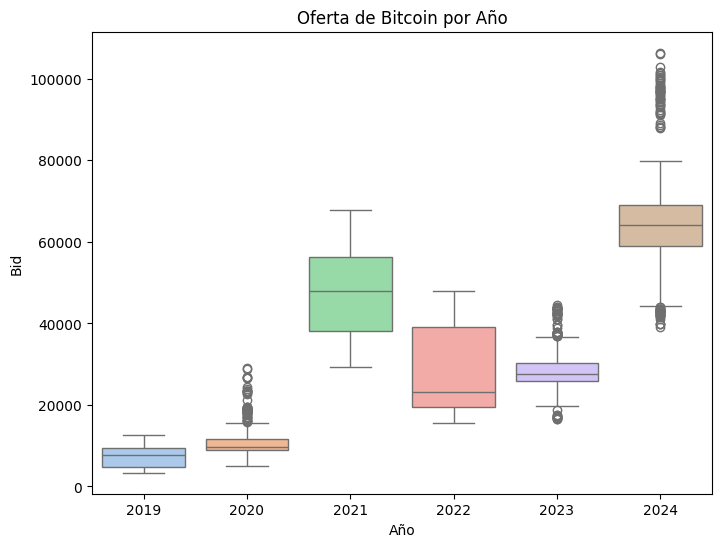

In [22]:
# Gráfico de cajas - Bitcoin
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Año', y='Bid', palette='pastel')
plt.title('Oferta de Bitcoin por Año')
plt.xlabel('Año')
plt.ylabel('Bid')
plt.show()

<ipython-input-23-7f425eba1285>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data2, x='Mes', y='Bid', palette='pastel')


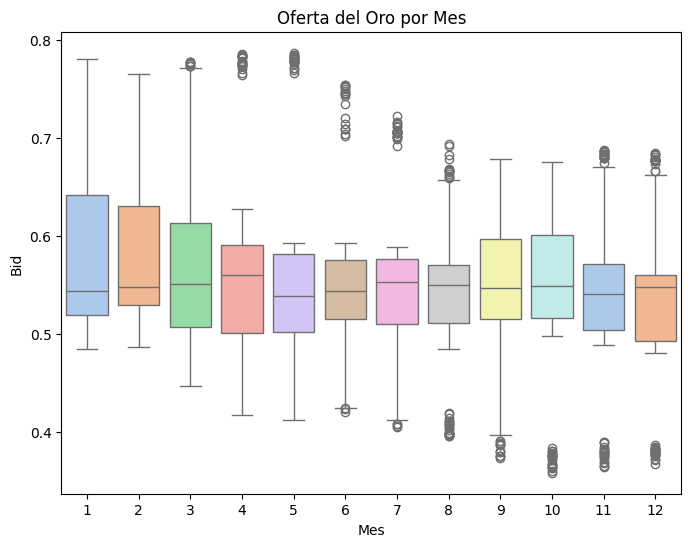

In [23]:
# Gráfico de cajas - Oro
plt.figure(figsize=(8, 6))
sns.boxplot(data=data2, x='Mes', y='Bid', palette='pastel')
plt.title('Oferta del Oro por Mes')
plt.xlabel('Mes')
plt.ylabel('Bid')
plt.show()

<ipython-input-24-378dfa0a5718>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data2, x='Año', y='High', palette='pastel')


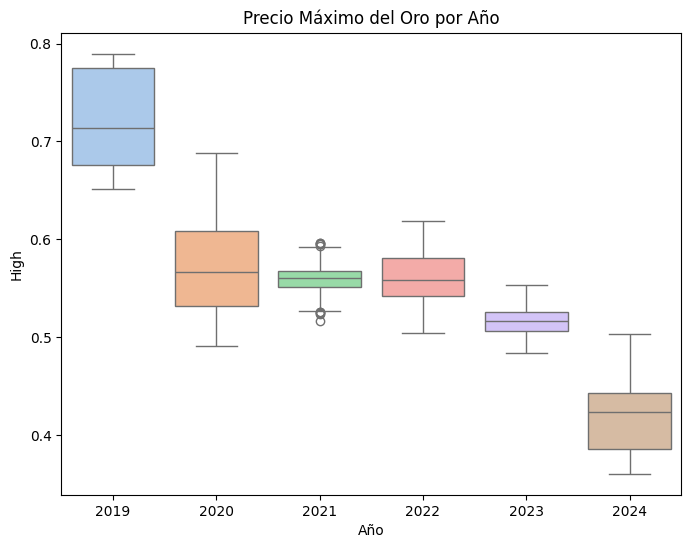

In [24]:
# Gráfico de cajas - Oro
plt.figure(figsize=(8, 6))
sns.boxplot(data=data2, x='Año', y='High', palette='pastel')
plt.title('Precio Máximo del Oro por Año')
plt.xlabel('Año')
plt.ylabel('High')
plt.show()

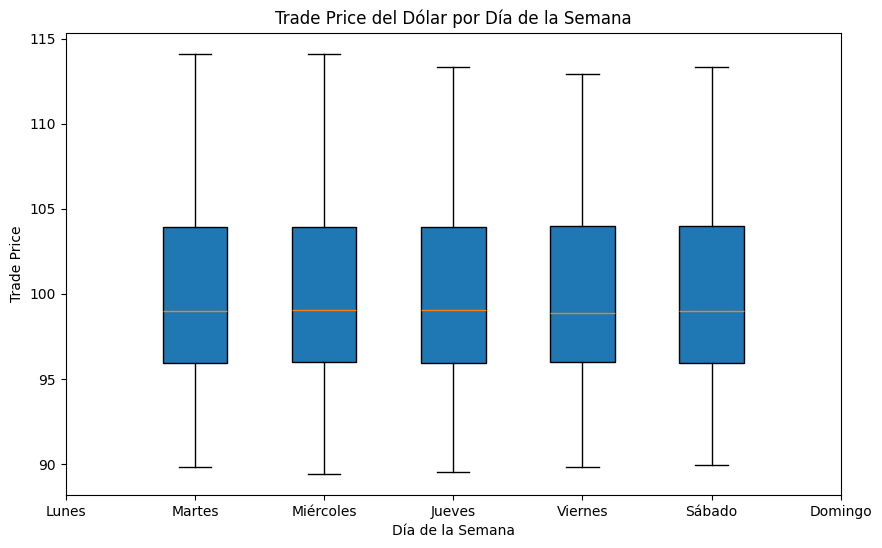

In [25]:
# Gráfico de cajas - Dolar
grouped = dolar_df.groupby('Día de la Semana')['Trade Price'].apply(list)
plt.figure(figsize=(10, 6))  # Ajustar tamaño del gráfico
plt.boxplot(grouped, vert=True, patch_artist=True)
plt.title('Trade Price del Dólar por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Trade Price')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.show()

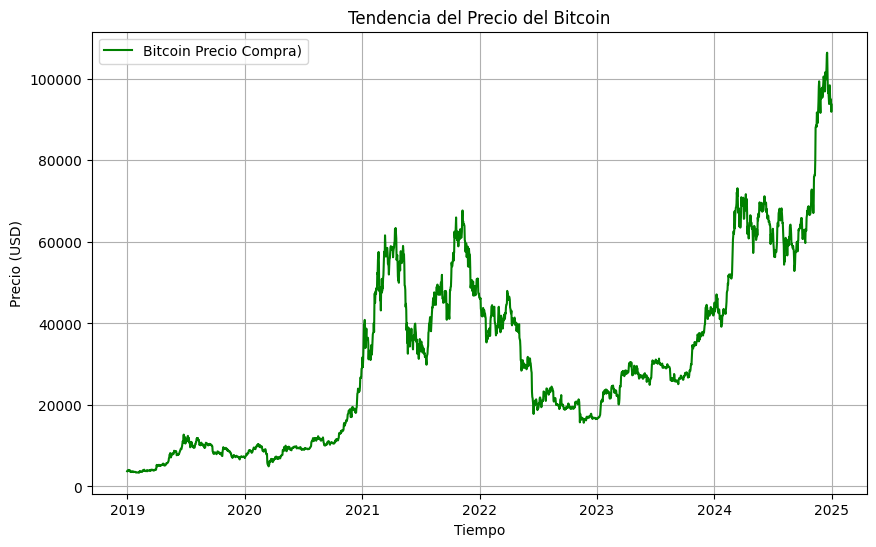

In [26]:
# Visualización de tendencias - Bitcoin
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Exchange Date', y='Bid', color='green', label='Bitcoin Precio Compra)')
plt.title('Tendencia del Precio del Bitcoin')
plt.xlabel('Tiempo')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid()
plt.show()

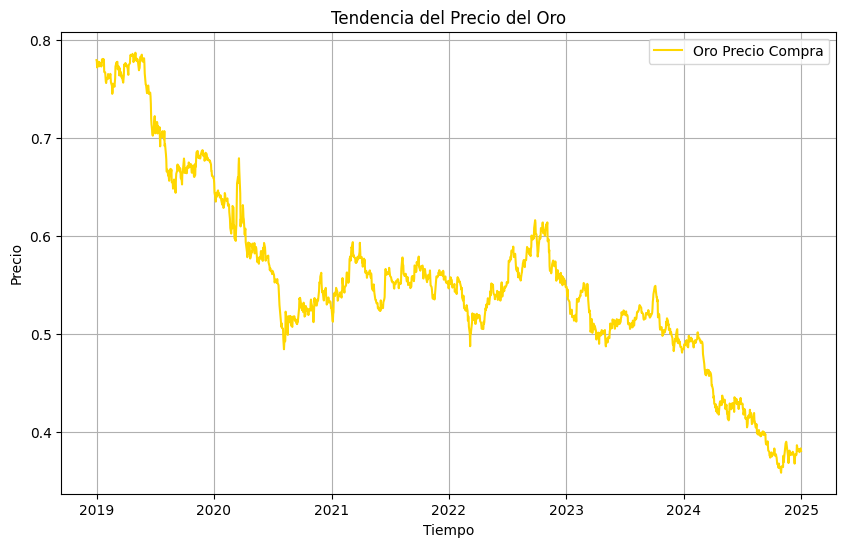

In [27]:
# Visualización de tendencias - Oro
plt.figure(figsize=(10, 6))
sns.lineplot(data=data2, x='Exchange Date', y='Bid', color='gold', label='Oro Precio Compra')
plt.title('Tendencia del Precio del Oro')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.grid()
plt.show()

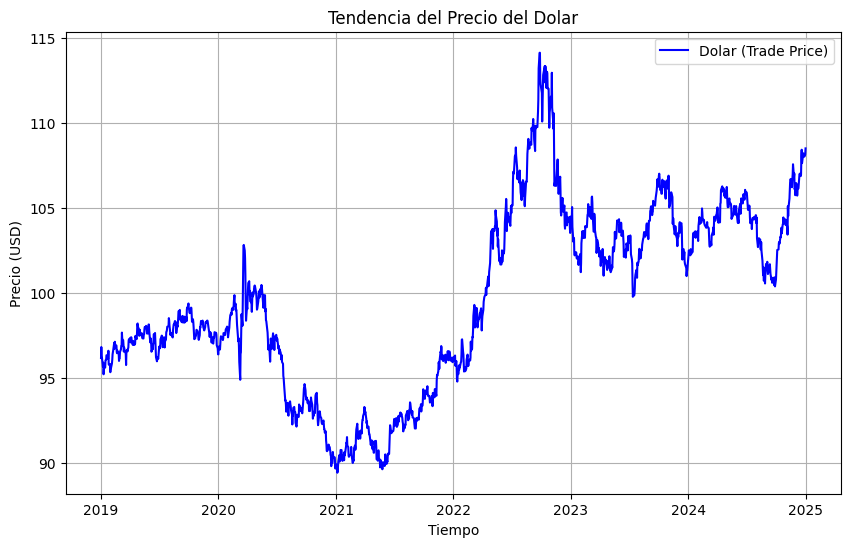

In [28]:
#  Visualización de tendencias
plt.figure(figsize=(10, 6))
sns.lineplot(data=data3, x='Exchange Date', y='Trade Price', color='blue', label='Dolar (Trade Price)')
plt.title('Tendencia del Precio del Dolar')
plt.xlabel('Tiempo')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid()
plt.show()


Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF):
Estadístico ADF: -1.3583317659818992
Valor p: 0.6020814791099098
Valores críticos:
   1%: -3.498198082189098
   5%: -2.891208211860468
   10%: -2.5825959973472097
No se puede rechazar la hipótesis nula: La serie no es estacionaria.


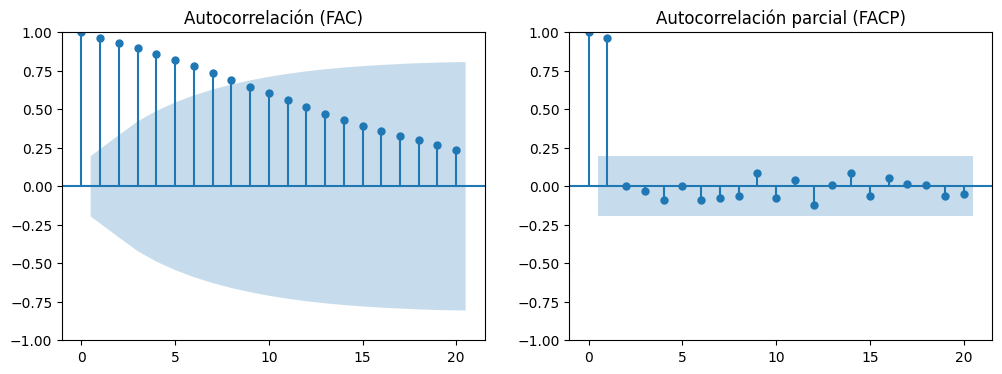


Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF):
Estadístico ADF: -1.8975904890519297
Valor p: 0.33319546838684744
Valores críticos:
   1%: -3.498198082189098
   5%: -2.891208211860468
   10%: -2.5825959973472097
No se puede rechazar la hipótesis nula: La serie no es estacionaria.


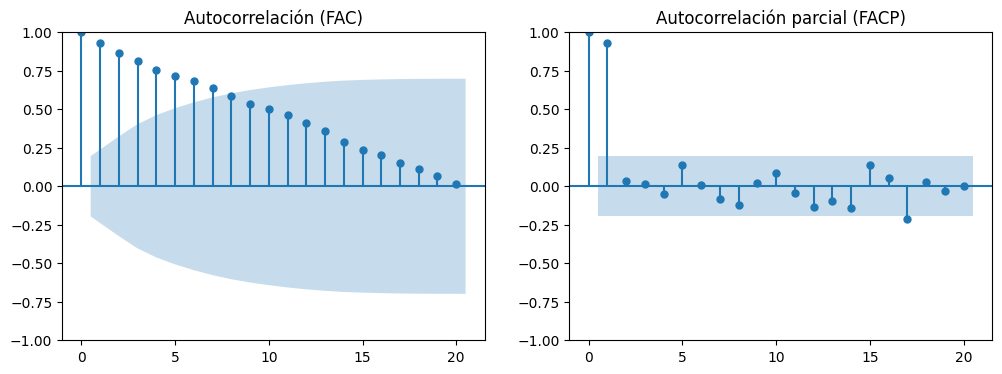


Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF):
Estadístico ADF: -2.640166265127232
Valor p: 0.08497656878623072
Valores críticos:
   1%: -3.4989097606014496
   5%: -2.891516256916761
   10%: -2.5827604414827157
No se puede rechazar la hipótesis nula: La serie no es estacionaria.


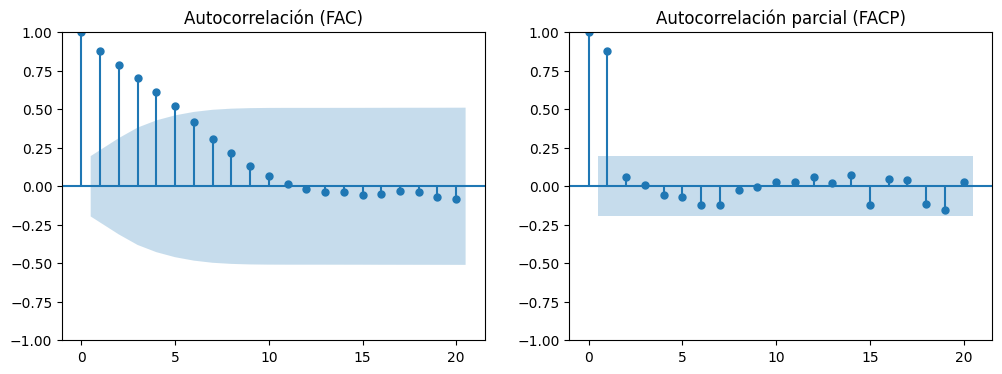

In [29]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Función para realizar pruebas de estacionariedad
def test_stationarity(df, column_name):
    print(f"\nResultados para {column_name}:")

    # Prueba de Dickey-Fuller Aumentada (ADF)
    result_adf = ts.adfuller(df[column_name])
    print("Prueba Dickey-Fuller Aumentada (ADF):")
    print(f"Estadístico ADF: {result_adf[0]}")
    print(f"Valor p: {result_adf[1]}")
    print("Valores críticos:")
    for key, value in result_adf[4].items():
        print(f"   {key}: {value}")

    if result_adf[1] < 0.05:
        print("Rechazamos la hipótesis nula: La serie es estacionaria.")
    else:
        print("No se puede rechazar la hipótesis nula: La serie no es estacionaria.")

    # Gráficos de ACF y PACF
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(df[column_name], ax=axes[0], lags=20)
    plot_pacf(df[column_name], ax=axes[1], lags=20)
    axes[0].set_title("Autocorrelación (FAC)")
    axes[1].set_title("Autocorrelación parcial (FACP)")
    plt.show()

# Datos simulados para Bitcoin, Oro y Dólar
np.random.seed(42)
bitcoin_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})
oro_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})
dolar_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})

# Aplicar pruebas a cada serie temporal
test_stationarity(bitcoin_df, 'value')
test_stationarity(oro_df, 'value')
test_stationarity(dolar_df, 'value')



Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF) después de la diferenciación:
Estadístico ADF: -10.008881137130237
Valor p: 1.800687720719554e-17
Valores críticos:
   1%: -3.4989097606014496
   5%: -2.891516256916761
   10%: -2.5827604414827157
Rechazamos la hipótesis nula: La serie diferenciada es estacionaria.


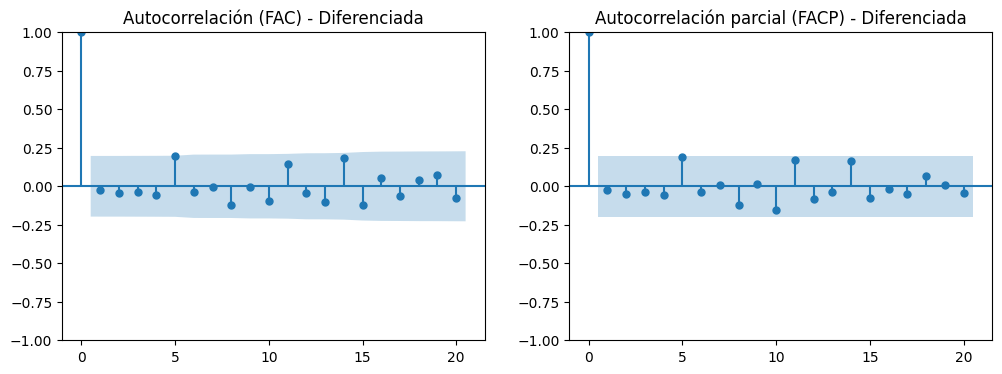


Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF) después de la diferenciación:
Estadístico ADF: -10.809982939729167
Valor p: 1.9196947925176694e-19
Valores críticos:
   1%: -3.4989097606014496
   5%: -2.891516256916761
   10%: -2.5827604414827157
Rechazamos la hipótesis nula: La serie diferenciada es estacionaria.


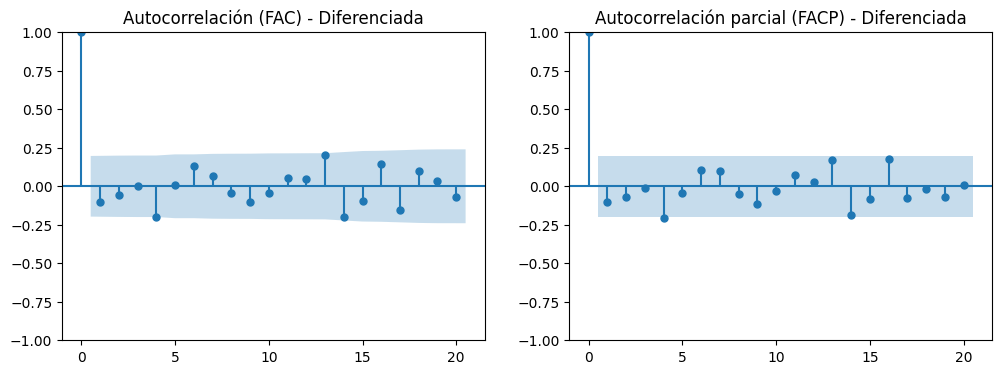


Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF) después de la diferenciación:
Estadístico ADF: -11.066490842080276
Valor p: 4.667552181128384e-20
Valores críticos:
   1%: -3.4989097606014496
   5%: -2.891516256916761
   10%: -2.5827604414827157
Rechazamos la hipótesis nula: La serie diferenciada es estacionaria.


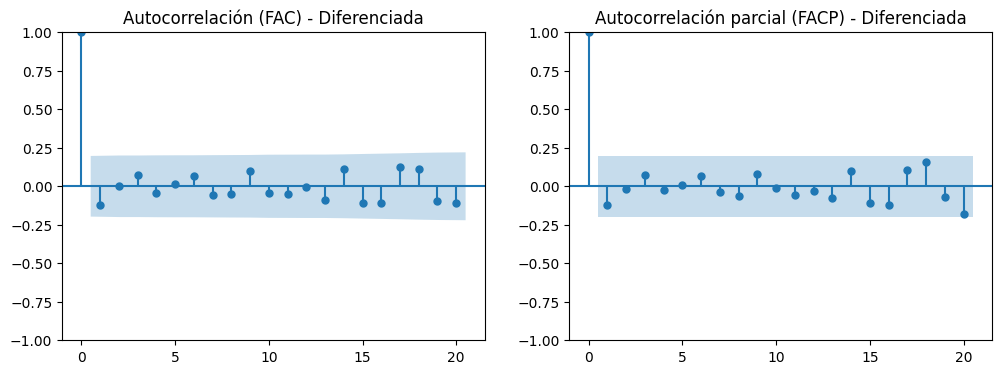

In [30]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Función para realizar pruebas de estacionariedad con diferenciación
def test_stationarity(df, column_name):
    print(f"\nResultados para {column_name}:")

    # Aplicar primera diferencia
    df_diff = df[column_name].diff().dropna()

    # Prueba de Dickey-Fuller Aumentada (ADF)
    result_adf = ts.adfuller(df_diff)
    print("Prueba Dickey-Fuller Aumentada (ADF) después de la diferenciación:")
    print(f"Estadístico ADF: {result_adf[0]}")
    print(f"Valor p: {result_adf[1]}")
    print("Valores críticos:")
    for key, value in result_adf[4].items():
        print(f"   {key}: {value}")

    if result_adf[1] < 0.05:
        print("Rechazamos la hipótesis nula: La serie diferenciada es estacionaria.")
    else:
        print("No se puede rechazar la hipótesis nula: La serie diferenciada no es estacionaria.")

    # Gráficos de ACF y PACF después de la diferenciación
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(df_diff, ax=axes[0], lags=20)
    plot_pacf(df_diff, ax=axes[1], lags=20)
    axes[0].set_title("Autocorrelación (FAC) - Diferenciada")
    axes[1].set_title("Autocorrelación parcial (FACP) - Diferenciada")
    plt.show()

# Datos simulados para Bitcoin, Oro y Dólar
np.random.seed(42)
bitcoin_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})
oro_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})
dolar_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})

# Aplicar pruebas a cada serie temporal
test_stationarity(bitcoin_df, 'value')
test_stationarity(oro_df, 'value')
test_stationarity(dolar_df, 'value')


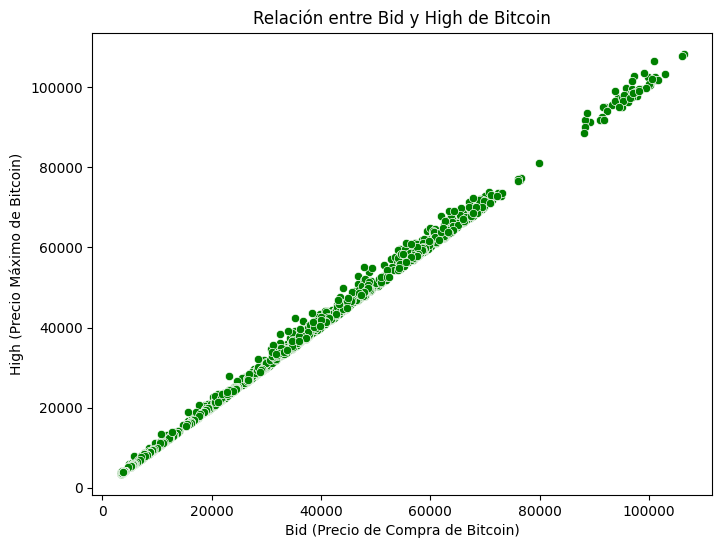

Correlación entre Bid y High para Bitcoin:
           Bid      High
Bid   1.000000  0.999336
High  0.999336  1.000000


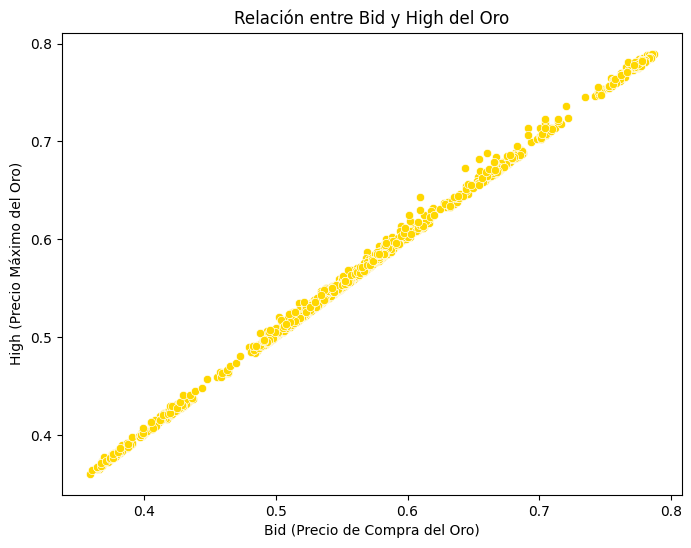

Correlación entre Bid y High para el Oro:
           Bid      High
Bid   1.000000  0.999353
High  0.999353  1.000000


In [31]:
# Relación entre variables
# Para Bitcoin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Bid', y='High', color='green')
plt.title('Relación entre Bid y High de Bitcoin')
plt.xlabel('Bid (Precio de Compra de Bitcoin)')
plt.ylabel('High (Precio Máximo de Bitcoin)')
plt.show()

correlation_bitcoin = data[['Bid', 'High']].corr()
print(f"Correlación entre Bid y High para Bitcoin:\n{correlation_bitcoin}")
# Para Oro
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x='Bid', y='High', color='gold')
plt.title('Relación entre Bid y High del Oro')
plt.xlabel('Bid (Precio de Compra del Oro)')
plt.ylabel('High (Precio Máximo del Oro)')
plt.show()

# Calcular la correlación entre Bid y High para el Oro
correlation_oro = data2[['Bid', 'High']].corr()
print(f"Correlación entre Bid y High para el Oro:\n{correlation_oro}")

In [32]:
print("Tipos de datos antes de convertir:")
print(bitcoin_df.dtypes)

# Convertir TODAS las columnas a numéricas (forzando la conversión si es posible)
bitcoin_df = bitcoin_df.apply(pd.to_numeric, errors='coerce')

# Verificar qué columnas quedaron como numéricas después de la conversión
variables_numericas = bitcoin_df.select_dtypes(include=['float64', 'int'])

# Mostrar las columnas detectadas como numéricas
print("Columnas numéricas detectadas:", variables_numericas.columns)

# Verificar si hay columnas eliminadas por ser constantes
print("Desviación estándar de cada columna:")
print(variables_numericas.std())

# Generar la matriz de correlación si hay más de una variable numérica
if len(variables_numericas.columns) > 1:
    correlation_matrix = variables_numericas.corr()
    print("Matriz de correlación:")
    print(correlation_matrix)
else:
    print("Solo se detectó una columna numérica, no se puede hacer matriz de correlación.")


Tipos de datos antes de convertir:
value    float64
dtype: object
Columnas numéricas detectadas: Index(['value'], dtype='object')
Desviación estándar de cada columna:
value    4.643998
dtype: float64
Solo se detectó una columna numérica, no se puede hacer matriz de correlación.


In [33]:
# Identificación de outliers - Bitcoin

# Usaremos el método de Z-score para identificar outliers
def detect_outliers_zscore(bitcoin_df, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = zscore(bitcoin_df[col].dropna())  # Evitar valores nulos
        outliers[col] = np.where(np.abs(z_scores) > threshold)[0]  # Índices de outliers
    return outliers

# Seleccionar las columnas numéricas para analizar outliers
numeric_columns = data.select_dtypes(include=np.number).columns

# Identificar outliers en las columnas numéricas
outliers = detect_outliers_zscore(data, numeric_columns)

# Imprimir los índices de los outliers detectados
for col, indices in outliers.items():
    print(f"\nOutliers detectados en la columna '{col}': {indices}")


Outliers detectados en la columna 'Bid': [ 6  7 13 14 15 16 17 18 19 20 23 24 25 26 27 30 38 39 40]

Outliers detectados en la columna 'Ask': [ 6  7 13 14 15 16 17 18 19 20 23 24 25 26 27 30 38 39 40]

Outliers detectados en la columna 'High': [ 5 12 13 14 15 16 17 18 19 20 22 23 24 25 26]

Outliers detectados en la columna 'Low': [ 6 10 12 13 14 15 16 17 18 19 20 23 24 26 30 31 37 38 39]

Outliers detectados en la columna 'Volatilidad': [ 148  659  782  783  784  926  932  964 1123 1211 1254 1317 1318 1320
 1321 1322 1328 1353 1407 1408 1422 1432 1439 1450 1457 1696 1704 1707
 1744 1747 1748 1751 1752 1754 1755 1894 1925 1993 1995 2013 2014 2015
 2055 2059 2100]

Outliers detectados en la columna 'Rendimiento': [ 658  781  782  925  926  931  966 1074 1186 1316 1317 1319 1321 1400
 1406 1421 1439 1449 1457 1695 1702 1706 1747 1749 1754 1893 1924 1994
 2013 2014 2036 2058 2060 2099 2142]

Outliers detectados en la columna 'Año': []

Outliers detectados en la columna 'Mes': []

Outlier

In [34]:
# Identificación de outliers - Oro

# Usaremos el método de Z-score para identificar outliers
def detect_outliers_zscore(oro_df, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = zscore(oro_df[col].dropna())  # Evitar valores nulos
        outliers[col] = np.where(np.abs(z_scores) > threshold)[0]  # Índices de outliers
    return outliers

# Seleccionar las columnas numéricas para analizar outliers
numeric_columns = data.select_dtypes(include=np.number).columns

# Identificar outliers en las columnas numéricas
outliers = detect_outliers_zscore(data, numeric_columns)

# Imprimir los índices de los outliers detectados
for col, indices in outliers.items():
    print(f"\nOutliers detectados en la columna '{col}': {indices}")


Outliers detectados en la columna 'Bid': [ 6  7 13 14 15 16 17 18 19 20 23 24 25 26 27 30 38 39 40]

Outliers detectados en la columna 'Ask': [ 6  7 13 14 15 16 17 18 19 20 23 24 25 26 27 30 38 39 40]

Outliers detectados en la columna 'High': [ 5 12 13 14 15 16 17 18 19 20 22 23 24 25 26]

Outliers detectados en la columna 'Low': [ 6 10 12 13 14 15 16 17 18 19 20 23 24 26 30 31 37 38 39]

Outliers detectados en la columna 'Volatilidad': [ 148  659  782  783  784  926  932  964 1123 1211 1254 1317 1318 1320
 1321 1322 1328 1353 1407 1408 1422 1432 1439 1450 1457 1696 1704 1707
 1744 1747 1748 1751 1752 1754 1755 1894 1925 1993 1995 2013 2014 2015
 2055 2059 2100]

Outliers detectados en la columna 'Rendimiento': [ 658  781  782  925  926  931  966 1074 1186 1316 1317 1319 1321 1400
 1406 1421 1439 1449 1457 1695 1702 1706 1747 1749 1754 1893 1924 1994
 2013 2014 2036 2058 2060 2099 2142]

Outliers detectados en la columna 'Año': []

Outliers detectados en la columna 'Mes': []

Outlier

In [35]:
# Identificación de outliers - Dolar

# Usaremos el método de Z-score para identificar outliers
def detect_outliers_zscore(dolar_df, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = zscore(dolar_df[col].dropna())  # Evitar valores nulos
        outliers[col] = np.where(np.abs(z_scores) > threshold)[0]  # Índices de outliers
    return outliers

# Seleccionar las columnas numéricas para analizar outliers
numeric_columns = data.select_dtypes(include=np.number).columns

# Identificar outliers en las columnas numéricas
outliers = detect_outliers_zscore(data, numeric_columns)

# Imprimir los índices de los outliers detectados
for col, indices in outliers.items():
    print(f"\nOutliers detectados en la columna '{col}': {indices}")


Outliers detectados en la columna 'Bid': [ 6  7 13 14 15 16 17 18 19 20 23 24 25 26 27 30 38 39 40]

Outliers detectados en la columna 'Ask': [ 6  7 13 14 15 16 17 18 19 20 23 24 25 26 27 30 38 39 40]

Outliers detectados en la columna 'High': [ 5 12 13 14 15 16 17 18 19 20 22 23 24 25 26]

Outliers detectados en la columna 'Low': [ 6 10 12 13 14 15 16 17 18 19 20 23 24 26 30 31 37 38 39]

Outliers detectados en la columna 'Volatilidad': [ 148  659  782  783  784  926  932  964 1123 1211 1254 1317 1318 1320
 1321 1322 1328 1353 1407 1408 1422 1432 1439 1450 1457 1696 1704 1707
 1744 1747 1748 1751 1752 1754 1755 1894 1925 1993 1995 2013 2014 2015
 2055 2059 2100]

Outliers detectados en la columna 'Rendimiento': [ 658  781  782  925  926  931  966 1074 1186 1316 1317 1319 1321 1400
 1406 1421 1439 1449 1457 1695 1702 1706 1747 1749 1754 1893 1924 1994
 2013 2014 2036 2058 2060 2099 2142]

Outliers detectados en la columna 'Año': []

Outliers detectados en la columna 'Mes': []

Outlier

In [45]:
# Sustitución de valores nulos - Bitcoin
# Reemplazar valores nulos solo con la media para columnas numéricas
for col in bitcoin_df.columns:
  if bitcoin_df[col].isnull().sum() > 0:
        if bitcoin_df[col].dtype in ['int64', 'float64']:

            bitcoin_df[col].fillna(bitcoin_df[col].mean(), inplace=True)

# Verificar los resultados después de la sustitución
print("Datos después de reemplazar nulos por la media:")
print(bitcoin_df.isnull().sum())
print(bitcoin_df.head())

Datos después de reemplazar nulos por la media:
value    0
dtype: int64
      value
0  0.496714
1  0.358450
2  1.006138
3  2.529168
4  2.295015


In [46]:
# Sustitución de valores nulos - Oro

for col in oro_df.columns:
  if oro_df[col].isnull().sum() > 0:
        if oro_df[col].dtype in ['int64', 'float64']:

            oro_df[col].fillna(oro_df[col].mean(), inplace=True)


print("Datos después de reemplazar nulos por la media:")
print(oro_df.isnull().sum())
print(oro_df.head())

Datos después de reemplazar nulos por la media:
value    0
dtype: int64
      value
0 -1.415371
1 -1.836016
2 -2.178731
3 -2.981008
4 -3.142294


In [47]:
# Sustitución de valores nulos - Dolar
# Reemplazar valores nulos solo con la media para columnas numéricas
for col in dolar_df.columns:
  if dolar_df[col].isnull().sum() > 0:
        if dolar_df[col].dtype in ['int64', 'float64']:

            dolar_df[col].fillna(oro_df[col].mean(), inplace=True)

# Verificar los resultados después de la sustitución
print("Datos después de reemplazar nulos por la media:")
print(dolar_df.isnull().sum())
print(dolar_df.head())

Datos después de reemplazar nulos por la media:
value    0
dtype: int64
      value
0  0.357787
1  0.918572
2  2.001623
3  3.055425
4  1.677756


In [48]:
from google.colab import files

# DataFrame de Bitcoin
bitcoin_df.to_excel("bitcoin.xlsx", index=False)

# DataFrame de Oro
oro_df.to_excel("oro.xlsx", index=False)

# DataFrame de Dólar
dolar_df.to_excel("dolar.xlsx", index=False)

# Descargar los archivos
files.download("bitcoin.xlsx")
files.download("oro.xlsx")
files.download("dolar.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>